### 1. Missing Completely at Random (MCAR)

Definition: The missingness has no relationship with any other data (observed or unobserved).

Example:

Suppose we are collecting people's heights, but a few measurements were lost because of a technical error.

The missing values have nothing to do with height, age, gender, or any other feature.

## 2. Missing at Random (MAR)

Definition: The missingness is related to some observed data, but not to the value of the missing data itself.

Example:

In a medical survey, older people might be less likely to report their weight.

The missing weight values depend on age (observed variable), but not directly on weight itself.

## 3. Missing Not at Random (MNAR)

Definition: The missingness is related to the value of the missing data itself (unobserved).

Example:

People with very high incomes may refuse to report their income because it is sensitive.

Missingness depends on the income value itself.

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df.shape

(891, 15)

In [ ]:
## if remove missing values 
df.dropna().shape  

(182, 15)

<Axes: xlabel='age', ylabel='Count'>

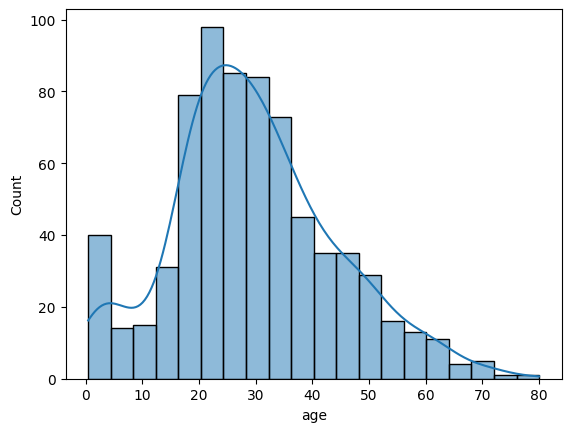

In [ ]:
sns.histplot(df['age'],kde=True) ## normal dist 

## 1. Mean Value Imputation

When to Use:

Data is numeric (e.g., height, weight, temperature).

Data is normally distributed (no extreme outliers).

Why: Mean represents the central tendency well when distribution is symmetrical.

In [17]:
df['age_mean']=df['age'].fillna(df['age'].mean())

df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


<Axes: xlabel='age_mean', ylabel='Count'>

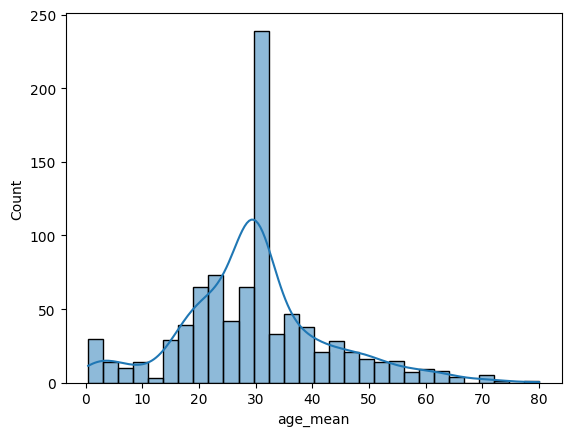

In [33]:
sns.histplot(df['age_mean'],kde=True) 

## 2. Median Value Imputation

When to Use:

Data is numeric.

Data has outliers or is skewed.

Why: Median is robust to outliers and gives a better central value in skewed data.

In [18]:
df['age_median']=df['age'].fillna(df['age'].median())
df[['age','age_mean','age_median']]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


## 3. Mode Value Imputation

When to Use:

Data is categorical (e.g., gender, city, product category).

Data has repeated values where most frequent value makes sense.

Why: Mode represents the most common category.

Example: Replacing missing “City” values with the most frequent city.

In [20]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
df['deck'].isnull().sum()

np.int64(688)

In [27]:
deck_mode_val=df['deck'].dropna().mode()[0]
df['deck_mode']=df['deck'].fillna(deck_mode_val)
df[['deck_mode','deck']]

,deck_mode,deck
0,C,NaN
1,C,C
2,C,NaN
3,C,C
4,C,NaN
...,...,...
886,C,NaN
887,B,B
888,C,NaN
889,C,C


In [28]:
deck_mode_val=df['embark_town'].dropna().mode()[0]
df['embark_town_mode']=df['embark_town'].fillna(deck_mode_val)
df[['embark_town_mode','embark_town']]

,embark_town_mode,embark_town
0,Southampton,Southampton
1,Cherbourg,Cherbourg
2,Southampton,Southampton
3,Southampton,Southampton
4,Southampton,Southampton
...,...,...
886,Southampton,Southampton
887,Southampton,Southampton
888,Southampton,Southampton
889,Cherbourg,Cherbourg


In [32]:
df.isnull().sum()

survived              0
pclass                0
sex                   0
age                 177
sibsp                 0
parch                 0
fare                  0
embarked              2
class                 0
who                   0
adult_male            0
deck                688
embark_town           2
alive                 0
alone                 0
age_mean              0
age_median            0
deck_mode             0
embark_town_mode      0
dtype: int64